# Naive Bayes Classifier using Gaussian Distribution

## Synthetic Data Generation (1 point)

In [ ]:
import numpy as np
import pandas as pd
import sklearn

## We will use the circles dataset to experiment with Naive Bayes Classifier using Gaussian Distribution.
## Read the documentation of the function make_circles at 
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles
## Describe the role of
## noise:Parameter, in the data this noise value is the standard deviation of the Gaussian noise which is added to it.  
##
## factor:Parameter, the scaling between the inner and outer circle and the value is in the range (0,1)
##
##
## You may want to plot the dataset and vary the above parameters to understand their impact on the data
##
##
## We will also use the train_test_split function to split the dataset into train and test.
## Read the documentation of the function train_test_split at
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
## Describe the role of
## test_size:Parameter, this is the ratio of the test split we want if we give a float value, else if we provide an integer then it is the number of test samples.
##           If both train and test is None then the default value is 0.25.
##
## stratify:Parameter, if the value is not None then it will make the split such that proportion of the values in the sample is same as proportion of values in the
##          parameter passed in stratify.
##
##

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## variable to store the size of the data to be generated
size_of_data=500

## variable to store the factor value to be passed to the make_circles function
factor_value = 0.8

## variable to store the noise value to be passed to the make_circles function
noise_value = 0.05

## call the make_circles function to store the returned data in a variable named Data and labels in label
Data, label = make_circles(n_samples=size_of_data,noise=noise_value,factor=factor_value)

## call the train_test_split function to split the data into train and test in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(Data,label,test_size=0.3,stratify=label)

## Training a Gaussian NBC (0.5 point)

In [ ]:
## Read the Documentation of GaussianNB class at 
## https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
## Describe the following parameters and attributes
## priors: Parameter,
##         The specification of prior probability of the classes else if it is not provided it will be adjusted according to the input data.
##
## class_count_: Attribute, an ndarray mentioning the count of training samples of each class. 
##
## var_: Attribute, an ndarray mentioning for every class the varience of each feature.
##
## theta_: Attribute, an ndarray mentioning for every class the mean og each feature.
##
##
from sklearn.naive_bayes import GaussianNB

## create an instance of the Gaussian NBC
gaussian_naive_bayes_model = GaussianNB()

## fit the classifier on the training data
gaussian_naive_bayes_model.fit(X_train,y_train)

GaussianNB()

## Plotting the Decision Boundary (0.5 point)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


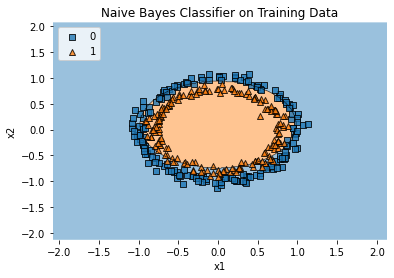

Variance  [[0.49036452 0.50160891]
 [0.33507491 0.304409  ]]
Mean [[-0.02226391 -0.09709476]
 [-0.01513099 -0.02035376]]


In [79]:
## Read through the documentation of mlxtend library's plot_decision_regions here
## http://rasbt.github.io/mlxtend/
## Call the function to visualize the decision surface
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X_train,y=y_train,clf=gaussian_naive_bayes_model)
plt.title("Naive Bayes Classifier on Training Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = "upper left")
plt.show()

print("Variance ",gaussian_naive_bayes_model.var_)
print("Mean", gaussian_naive_bayes_model.theta_)

## Describe the Gaussian Distributions for the two classes learned by the Naive Bayes Classifier. (0.5 point)

### The variance is 
Class | Feature | Variance | Mean
---|---|---|---
0|x1|0.49|-0.022
0|x2|0.50|-0.097
1|x1|0.33|-0.015
1|x2|0.30|-0.020

### Computing Performance on Test Data (0.5 point)

In [84]:
## Read through the documentation of sklearn's classification_report function here
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
## Call the function to print the Gaussian NBC's performance on the test set.
## Desribe the following outputs
## precision: It equals to the ratio of (count of true positive) / ((count of true positive) + (count of false positive))
##
## recall: It equals to the ratio of (count of true positive) / ((count of true positive) + (count of false negative))
##
##
from sklearn.metrics import classification_report
## Getting the predicted values on test data
y_test_predicted = gaussian_naive_bayes_model.predict(X_test)
## print the classification report.
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        75
           1       0.80      0.79      0.79        75

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



# Logistic Regression

## Synthetic Data Generation (0.5 point)

In [81]:
## We will use the blobs dataset to experiment with Logistic Regression
## Read the documentation of the function make_blobs at 
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
## Describe the parameters
## n_features: The count of features for each sample data point
##
## centers: Parameter, if an int is specified then it represents the count of the center locations also we can provide an ndarray then it will
##          make the centers according to the fixed locations of centers given in the array, if n_samples is int and centers is None
##          then by default 3 centers are generated, if n_samples is an array then centers can be None or an array with same size as n_samples. 
##            
##
##
## cluster_std: Parameter, This is the standard deviation of the clusters. 
##
##
## We will also use the train_test_split function to split the dataset into train and test.
from sklearn.datasets import make_blobs

## define variables to store the number of sample, features, centers, and the standard deviation of the blobs
n_samples = 500
n_features = 2
centers = np.array([[4,-4],[4,4],[-4,-4]])
cluster_std = 1

## call the make_blobs function to generate the blobs dataset consisting of 3 classes
X_blobs, y_blobs = make_blobs(n_samples=n_samples,n_features=n_features,centers=centers,cluster_std=cluster_std)
## create the train and test splits using the train_test_split function used earlier
## The ratio between train and test size should be 70:30
X_blobs_train, X_blobs_test, y_blobs_train, y_blobs_test = train_test_split(X_blobs,y_blobs,test_size=0.3,stratify=y_blobs)

## Training a Logistic Regressor (0.5 point)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


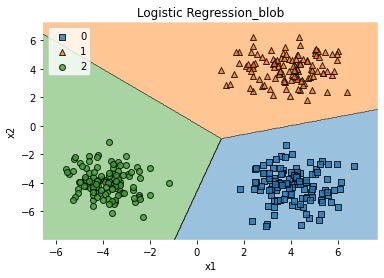

Intercept [-1.68629917  0.75625571  0.93004346]
Coef [[ 0.87597921 -0.85843382]
 [ 0.25801435  1.15131959]
 [-1.13399357 -0.29288577]]


In [85]:
## Read through the documentation of the Logsitic Regression class in the linear models here
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
## Describe the following outputs of the model
## coef_: An ndarray which gives the weights of the features
##
## intercept_: It gives the intercept for each classifier line of the classes, if fit_intercept is False then intercept is zero
##
##
from sklearn.linear_model import LogisticRegression

## create an instance of the logistic regressor
logistic_regression_model = LogisticRegression()

## Learn the classiifer using the training data
logistic_regression_model.fit(X_blobs_train,y_blobs_train)

## plot the decision boundaries between the classes using the plot_decision_regions function used earlier
plot_decision_regions(X=X_blobs_train,y=y_blobs_train,clf=logistic_regression_model)
plt.title("Logistic Regression_blob")
plt.legend(loc = "upper left")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
print("Intercept", logistic_regression_model.intercept_)
print("Coef", logistic_regression_model.coef_)

## Describe the regressors learned for each class (1 point)

###The regressors are mentioned here.

Class | Intercept
---|---
0|-1.68
1|0.75
2|0.93

Class | Feature | Coefficient
---|---|---
0|x1|0.87
0|x2|-0.85
1|x1|0.25
1|x2|1.15
2|x1|-1.13
2|x2|-0.29

## Estimate the performance of the regressor on the test dataset (0.5 point)

In [86]:
## Read through the documentation of Accuracy measure computation from the sklearn's metrics library here
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
from sklearn.metrics import accuracy_score

## Get the predicted values on test data
y_blobs_test_predicted = logistic_regression_model.predict(X_blobs_test)

## Compute the accuracy of the learned regressor on the test dataset
print(accuracy_score(y_blobs_test,y_blobs_test_predicted))

1.0
